<a href="https://colab.research.google.com/github/Coreym6/HelloAI/blob/main/Assign8_part2_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


100%|██████████| 170498071/170498071 [00:03<00:00, 46099909.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, 

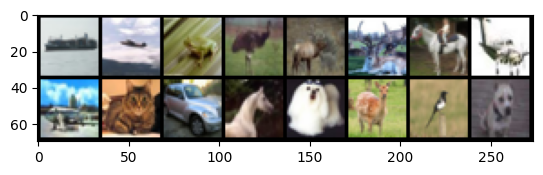

ship  plane frog  bird  deer  deer  horse plane plane cat   car   horse dog   deer  bird  dog  
[1,  2000] loss: 1.943
[2,  2000] loss: 1.282
[3,  2000] loss: 1.012
[4,  2000] loss: 0.811
[5,  2000] loss: 0.657
Finished Training
Accuracy for class: plane is 79.8 %
Accuracy for class: car   is 87.6 %
Accuracy for class: bird  is 51.0 %
Accuracy for class: cat   is 60.1 %
Accuracy for class: deer  is 83.0 %
Accuracy for class: dog   is 56.1 %
Accuracy for class: frog  is 79.1 %
Accuracy for class: horse is 71.6 %
Accuracy for class: ship  is 92.4 %
Accuracy for class: truck is 72.0 %


In [2]:
# source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

PATH = "/content/drive/MyDrive/models/classifier-vgg1.pt"
device = 'cuda'
batch_size = 16

# NOTE WE ARE ***NOT*** USING THIS MODEL, BUT IT IS A NICE EXAMPLE CLASSIFIER FOR CIFAR10
# INSTEAD, WE ARE USING THE VGG11 PUBLISHED VERY DEEP NERUAL NETWORK WHICH IS ALREADY BUILT INTO PYTORCH!!!
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

# we need to test our loaded model no matter what
transform = transforms.Compose(
    [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
num_classes = len(classes)
# net = Net() # no longer need this since we aren't building our own model
net = models.vgg11() # load the pre-built (but not pre-trained) vgg11 model
net.classifier[6] = nn.Linear(4096,num_classes) # modify stock vgg11 with its 1000 classes to handle our 10 classes - https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
print(net) # display the layers in the pre-built model

loadmodelweights = False # change this to True once you have ran this cell successfully!

if loadmodelweights:
    net.load_state_dict(torch.load(PATH))
    net = net.to(device)

else:
    # we only need to load the training data if we (re)training the model
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    # get some random training images
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # show images
    imshow(torchvision.utils.make_grid(images, normalize=True))

    # print labels
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
    net = net.to(device)

    import torch.optim as optim

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(5):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training')
    torch.save(net.state_dict(), PATH)

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


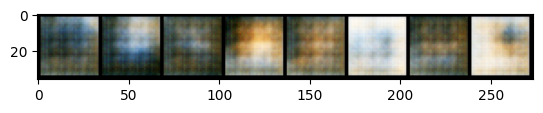

[1/20][0/391] Loss_D: 0.1871 Loss_G: 3.0151 D(x): 0.9452 D(G(z)): 0.1044 / 0.0803
saving the output
[1/20][50/391] Loss_D: 0.4591 Loss_G: 3.8422 D(x): 0.7705 D(G(z)): 0.1023 / 0.0556
saving the output
[1/20][100/391] Loss_D: 0.6334 Loss_G: 3.4534 D(x): 0.9087 D(G(z)): 0.3386 / 0.0610
saving the output
[1/20][150/391] Loss_D: 0.6272 Loss_G: 5.4324 D(x): 0.8643 D(G(z)): 0.3187 / 0.0090
saving the output
[1/20][200/391] Loss_D: 0.7651 Loss_G: 6.9539 D(x): 0.9266 D(G(z)): 0.4337 / 0.0022
saving the output
[1/20][250/391] Loss_D: 0.2386 Loss_G: 3.7668 D(x): 0.8997 D(G(z)): 0.0856 / 0.0806
saving the output
[1/20][300/391] Loss_D: 0.1798 Loss_G: 3.8018 D(x): 0.9007 D(G(z)): 0.0623 / 0.0294
saving the output
[1/20][350/391] Loss_D: 0.3656 Loss_G: 3.3684 D(x): 0.8896 D(G(z)): 0.1797 / 0.0699
saving the output


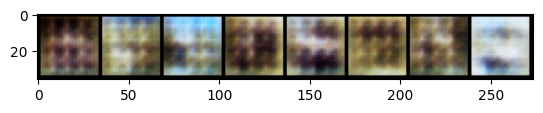

[2/20][0/391] Loss_D: 1.6111 Loss_G: 2.9578 D(x): 0.3828 D(G(z)): 0.0682 / 0.1190
saving the output
[2/20][50/391] Loss_D: 0.4092 Loss_G: 6.0301 D(x): 0.9106 D(G(z)): 0.2402 / 0.0034
saving the output
[2/20][100/391] Loss_D: 0.6787 Loss_G: 4.3917 D(x): 0.8116 D(G(z)): 0.2765 / 0.0259
saving the output
[2/20][150/391] Loss_D: 0.5060 Loss_G: 3.2834 D(x): 0.8057 D(G(z)): 0.1973 / 0.0548
saving the output
[2/20][200/391] Loss_D: 0.5181 Loss_G: 3.5247 D(x): 0.9252 D(G(z)): 0.2989 / 0.0518
saving the output
[2/20][250/391] Loss_D: 0.4204 Loss_G: 3.7034 D(x): 0.8774 D(G(z)): 0.2232 / 0.0340
saving the output
[2/20][300/391] Loss_D: 1.1880 Loss_G: 1.8748 D(x): 0.5485 D(G(z)): 0.3096 / 0.2117
saving the output
[2/20][350/391] Loss_D: 1.1866 Loss_G: 1.8862 D(x): 0.4101 D(G(z)): 0.0147 / 0.2204
saving the output


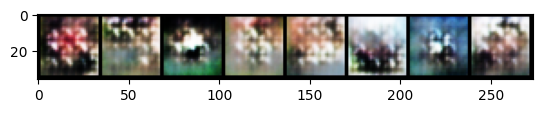

[3/20][0/391] Loss_D: 0.7959 Loss_G: 3.0530 D(x): 0.6605 D(G(z)): 0.2203 / 0.0678
saving the output
[3/20][50/391] Loss_D: 0.3971 Loss_G: 3.9506 D(x): 0.8386 D(G(z)): 0.1555 / 0.0369
saving the output
[3/20][100/391] Loss_D: 0.5838 Loss_G: 3.8460 D(x): 0.8156 D(G(z)): 0.2719 / 0.0395
saving the output
[3/20][150/391] Loss_D: 0.6371 Loss_G: 3.7784 D(x): 0.9038 D(G(z)): 0.3490 / 0.0386
saving the output
[3/20][200/391] Loss_D: 0.3564 Loss_G: 4.5052 D(x): 0.8982 D(G(z)): 0.1695 / 0.0220
saving the output
[3/20][250/391] Loss_D: 0.4263 Loss_G: 3.1614 D(x): 0.8180 D(G(z)): 0.1551 / 0.0637
saving the output
[3/20][300/391] Loss_D: 0.4937 Loss_G: 2.4971 D(x): 0.7493 D(G(z)): 0.1390 / 0.1273
saving the output
[3/20][350/391] Loss_D: 0.9346 Loss_G: 1.8269 D(x): 0.6003 D(G(z)): 0.2105 / 0.2060
saving the output


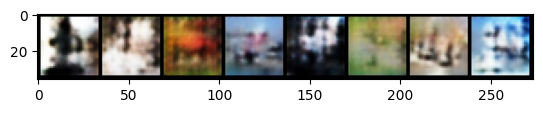

[4/20][0/391] Loss_D: 0.5311 Loss_G: 2.4543 D(x): 0.8091 D(G(z)): 0.2400 / 0.1143
saving the output
[4/20][50/391] Loss_D: 0.3979 Loss_G: 4.3736 D(x): 0.9040 D(G(z)): 0.2226 / 0.0220
saving the output
[4/20][100/391] Loss_D: 1.4513 Loss_G: 7.6527 D(x): 0.9643 D(G(z)): 0.7027 / 0.0009
saving the output
[4/20][150/391] Loss_D: 0.8359 Loss_G: 4.2324 D(x): 0.9084 D(G(z)): 0.4571 / 0.0231
saving the output
[4/20][200/391] Loss_D: 0.8553 Loss_G: 2.3126 D(x): 0.5304 D(G(z)): 0.0372 / 0.1360
saving the output
[4/20][250/391] Loss_D: 0.4950 Loss_G: 3.2245 D(x): 0.7778 D(G(z)): 0.1570 / 0.0723
saving the output
[4/20][300/391] Loss_D: 0.4682 Loss_G: 3.9736 D(x): 0.9005 D(G(z)): 0.2624 / 0.0298
saving the output
[4/20][350/391] Loss_D: 0.6306 Loss_G: 2.5014 D(x): 0.7276 D(G(z)): 0.2050 / 0.1113
saving the output


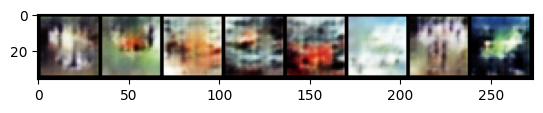

[5/20][0/391] Loss_D: 0.4951 Loss_G: 3.1536 D(x): 0.8008 D(G(z)): 0.2042 / 0.0591
saving the output
[5/20][50/391] Loss_D: 1.4889 Loss_G: 1.0578 D(x): 0.3426 D(G(z)): 0.0307 / 0.4023
saving the output
[5/20][100/391] Loss_D: 0.7654 Loss_G: 5.3689 D(x): 0.9429 D(G(z)): 0.4568 / 0.0075
saving the output
[5/20][150/391] Loss_D: 0.7152 Loss_G: 2.2633 D(x): 0.6817 D(G(z)): 0.2258 / 0.1428
saving the output
[5/20][200/391] Loss_D: 0.6593 Loss_G: 1.9873 D(x): 0.6329 D(G(z)): 0.1077 / 0.1787
saving the output
[5/20][250/391] Loss_D: 1.3365 Loss_G: 1.3363 D(x): 0.3708 D(G(z)): 0.0872 / 0.3337
saving the output
[5/20][300/391] Loss_D: 0.4460 Loss_G: 3.5233 D(x): 0.8762 D(G(z)): 0.2483 / 0.0382
saving the output
[5/20][350/391] Loss_D: 0.6105 Loss_G: 2.2363 D(x): 0.7035 D(G(z)): 0.1715 / 0.1306
saving the output


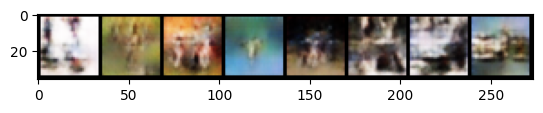

[6/20][0/391] Loss_D: 0.4458 Loss_G: 3.5093 D(x): 0.8508 D(G(z)): 0.2190 / 0.0410
saving the output
[6/20][50/391] Loss_D: 1.7220 Loss_G: 1.5833 D(x): 0.2349 D(G(z)): 0.0092 / 0.2765
saving the output
[6/20][100/391] Loss_D: 0.6533 Loss_G: 1.3194 D(x): 0.6511 D(G(z)): 0.1335 / 0.3113
saving the output
[6/20][150/391] Loss_D: 0.4948 Loss_G: 2.9777 D(x): 0.8346 D(G(z)): 0.2394 / 0.0671
saving the output
[6/20][200/391] Loss_D: 0.6375 Loss_G: 1.9486 D(x): 0.7341 D(G(z)): 0.2321 / 0.1727
saving the output
[6/20][250/391] Loss_D: 0.6130 Loss_G: 2.1685 D(x): 0.6716 D(G(z)): 0.1485 / 0.1484
saving the output
[6/20][300/391] Loss_D: 0.4517 Loss_G: 3.3912 D(x): 0.8991 D(G(z)): 0.2647 / 0.0487
saving the output
[6/20][350/391] Loss_D: 0.2772 Loss_G: 4.3350 D(x): 0.9020 D(G(z)): 0.1457 / 0.0189
saving the output


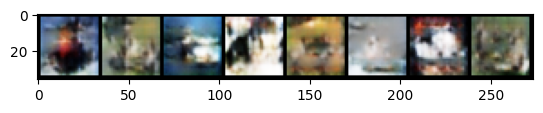

[7/20][0/391] Loss_D: 0.4516 Loss_G: 3.7449 D(x): 0.9006 D(G(z)): 0.2572 / 0.0372
saving the output
[7/20][50/391] Loss_D: 0.5967 Loss_G: 3.7045 D(x): 0.9013 D(G(z)): 0.3491 / 0.0358
saving the output
[7/20][100/391] Loss_D: 0.8810 Loss_G: 1.7492 D(x): 0.5760 D(G(z)): 0.2005 / 0.2123
saving the output
[7/20][150/391] Loss_D: 0.5419 Loss_G: 3.0037 D(x): 0.7857 D(G(z)): 0.2237 / 0.0658
saving the output
[7/20][200/391] Loss_D: 0.7281 Loss_G: 1.8757 D(x): 0.6281 D(G(z)): 0.1644 / 0.1847
saving the output
[7/20][250/391] Loss_D: 0.2417 Loss_G: 3.5908 D(x): 0.9392 D(G(z)): 0.1550 / 0.0352
saving the output
[7/20][300/391] Loss_D: 3.0059 Loss_G: 0.1384 D(x): 0.0707 D(G(z)): 0.0064 / 0.8791
saving the output
[7/20][350/391] Loss_D: 0.2669 Loss_G: 3.5642 D(x): 0.9033 D(G(z)): 0.1453 / 0.0361
saving the output


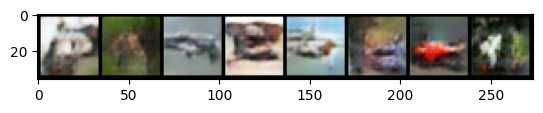

[8/20][0/391] Loss_D: 1.3136 Loss_G: 0.7104 D(x): 0.3532 D(G(z)): 0.0993 / 0.5369
saving the output
[8/20][50/391] Loss_D: 0.5478 Loss_G: 5.7056 D(x): 0.9486 D(G(z)): 0.3694 / 0.0044
saving the output
[8/20][100/391] Loss_D: 0.1912 Loss_G: 3.7727 D(x): 0.8518 D(G(z)): 0.0240 / 0.0302
saving the output
[8/20][150/391] Loss_D: 1.1695 Loss_G: 2.6511 D(x): 0.3931 D(G(z)): 0.0289 / 0.1149
saving the output
[8/20][200/391] Loss_D: 1.9154 Loss_G: 9.2872 D(x): 0.9956 D(G(z)): 0.8198 / 0.0001
saving the output
[8/20][250/391] Loss_D: 0.1945 Loss_G: 2.9907 D(x): 0.9165 D(G(z)): 0.0932 / 0.0672
saving the output
[8/20][300/391] Loss_D: 0.1842 Loss_G: 3.0422 D(x): 0.9001 D(G(z)): 0.0705 / 0.0574
saving the output
[8/20][350/391] Loss_D: 0.1025 Loss_G: 3.9901 D(x): 0.9764 D(G(z)): 0.0742 / 0.0229
saving the output


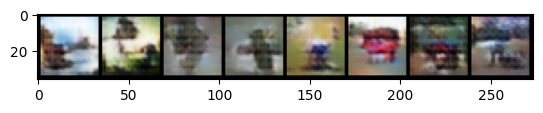

[9/20][0/391] Loss_D: 0.8683 Loss_G: 3.1611 D(x): 0.7262 D(G(z)): 0.3529 / 0.0741
saving the output
[9/20][50/391] Loss_D: 0.8802 Loss_G: 2.1143 D(x): 0.6922 D(G(z)): 0.3304 / 0.1543
saving the output
[9/20][100/391] Loss_D: 0.3307 Loss_G: 2.4299 D(x): 0.7920 D(G(z)): 0.0785 / 0.1139
saving the output
[9/20][150/391] Loss_D: 0.8297 Loss_G: 4.0790 D(x): 0.9409 D(G(z)): 0.4986 / 0.0223
saving the output
[9/20][200/391] Loss_D: 0.1407 Loss_G: 3.3581 D(x): 0.9603 D(G(z)): 0.0918 / 0.0458
saving the output
[9/20][250/391] Loss_D: 10.0035 Loss_G: 5.2227 D(x): 1.0000 D(G(z)): 0.9999 / 0.0118
saving the output
[9/20][300/391] Loss_D: 1.4823 Loss_G: 3.4630 D(x): 0.8608 D(G(z)): 0.6746 / 0.0555
saving the output
[9/20][350/391] Loss_D: 0.4458 Loss_G: 3.4982 D(x): 0.9199 D(G(z)): 0.2828 / 0.0384
saving the output


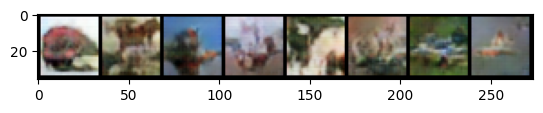

[10/20][0/391] Loss_D: 1.2877 Loss_G: 1.1197 D(x): 0.4193 D(G(z)): 0.2666 / 0.3698
saving the output
[10/20][50/391] Loss_D: 0.4279 Loss_G: 3.2670 D(x): 0.8462 D(G(z)): 0.2048 / 0.0493
saving the output
[10/20][100/391] Loss_D: 0.9497 Loss_G: 2.3397 D(x): 0.8783 D(G(z)): 0.5120 / 0.1248
saving the output
[10/20][150/391] Loss_D: 0.4065 Loss_G: 3.4722 D(x): 0.8778 D(G(z)): 0.2256 / 0.0387
saving the output
[10/20][200/391] Loss_D: 0.1924 Loss_G: 4.2883 D(x): 0.9600 D(G(z)): 0.1341 / 0.0184
saving the output
[10/20][250/391] Loss_D: 0.1811 Loss_G: 3.3660 D(x): 0.9131 D(G(z)): 0.0807 / 0.0468
saving the output
[10/20][300/391] Loss_D: 0.2848 Loss_G: 3.8485 D(x): 0.8743 D(G(z)): 0.1258 / 0.0300
saving the output
[10/20][350/391] Loss_D: 1.1076 Loss_G: 0.4176 D(x): 0.6001 D(G(z)): 0.2768 / 0.7250
saving the output


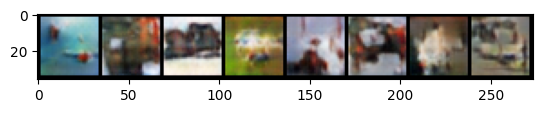

[11/20][0/391] Loss_D: 0.6769 Loss_G: 1.8825 D(x): 0.6811 D(G(z)): 0.2001 / 0.1899
saving the output
[11/20][50/391] Loss_D: 0.4629 Loss_G: 4.4092 D(x): 0.9428 D(G(z)): 0.3005 / 0.0168
saving the output
[11/20][100/391] Loss_D: 0.9784 Loss_G: 1.5112 D(x): 0.4515 D(G(z)): 0.0484 / 0.2676
saving the output
[11/20][150/391] Loss_D: 0.0670 Loss_G: 4.2476 D(x): 0.9789 D(G(z)): 0.0437 / 0.0190
saving the output
[11/20][200/391] Loss_D: 0.3446 Loss_G: 4.1923 D(x): 0.9815 D(G(z)): 0.2581 / 0.0222
saving the output
[11/20][250/391] Loss_D: 0.7541 Loss_G: 3.0396 D(x): 0.8158 D(G(z)): 0.3738 / 0.0611
saving the output
[11/20][300/391] Loss_D: 0.8191 Loss_G: 2.1729 D(x): 0.7156 D(G(z)): 0.3434 / 0.1383
saving the output
[11/20][350/391] Loss_D: 0.1802 Loss_G: 2.8318 D(x): 0.9117 D(G(z)): 0.0777 / 0.0760
saving the output


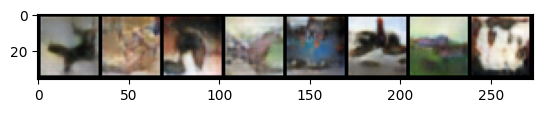

[12/20][0/391] Loss_D: 1.0761 Loss_G: 2.3851 D(x): 0.7957 D(G(z)): 0.5174 / 0.1223
saving the output
[12/20][50/391] Loss_D: 0.1400 Loss_G: 3.3366 D(x): 0.9489 D(G(z)): 0.0803 / 0.0459
saving the output
[12/20][100/391] Loss_D: 1.0640 Loss_G: 0.8492 D(x): 0.4256 D(G(z)): 0.0866 / 0.4651
saving the output
[12/20][150/391] Loss_D: 2.1887 Loss_G: 6.2504 D(x): 0.9927 D(G(z)): 0.8359 / 0.0031
saving the output
[12/20][200/391] Loss_D: 0.2796 Loss_G: 4.8621 D(x): 0.9700 D(G(z)): 0.2107 / 0.0103
saving the output
[12/20][250/391] Loss_D: 6.8422 Loss_G: 3.4410 D(x): 0.0017 D(G(z)): 0.0001 / 0.0473
saving the output
[12/20][300/391] Loss_D: 0.4077 Loss_G: 2.1150 D(x): 0.7923 D(G(z)): 0.1373 / 0.1474
saving the output
[12/20][350/391] Loss_D: 0.0947 Loss_G: 3.9167 D(x): 0.9290 D(G(z)): 0.0184 / 0.0277
saving the output


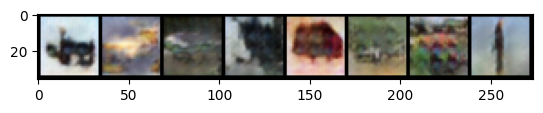

[13/20][0/391] Loss_D: 0.7992 Loss_G: 1.8161 D(x): 0.7380 D(G(z)): 0.3468 / 0.2039
saving the output
[13/20][50/391] Loss_D: 0.5453 Loss_G: 2.2547 D(x): 0.8326 D(G(z)): 0.2657 / 0.1375
saving the output
[13/20][100/391] Loss_D: 1.4487 Loss_G: 2.8753 D(x): 0.2933 D(G(z)): 0.0174 / 0.0786
saving the output
[13/20][150/391] Loss_D: 0.5905 Loss_G: 2.8182 D(x): 0.8764 D(G(z)): 0.3223 / 0.0834
saving the output
[13/20][200/391] Loss_D: 0.0765 Loss_G: 4.0029 D(x): 0.9811 D(G(z)): 0.0549 / 0.0228
saving the output
[13/20][250/391] Loss_D: 0.9315 Loss_G: 1.3746 D(x): 0.6549 D(G(z)): 0.3558 / 0.2822
saving the output
[13/20][300/391] Loss_D: 0.3745 Loss_G: 2.2087 D(x): 0.7938 D(G(z)): 0.1099 / 0.1451
saving the output
[13/20][350/391] Loss_D: 0.2063 Loss_G: 3.9657 D(x): 0.9384 D(G(z)): 0.1241 / 0.0260
saving the output


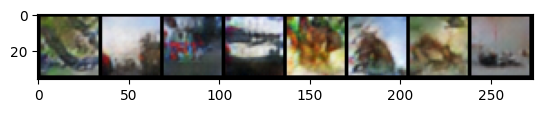

[14/20][0/391] Loss_D: 0.4106 Loss_G: 8.9913 D(x): 0.9952 D(G(z)): 0.3167 / 0.0002
saving the output
[14/20][50/391] Loss_D: 1.4867 Loss_G: 0.7545 D(x): 0.2835 D(G(z)): 0.0285 / 0.5285
saving the output
[14/20][100/391] Loss_D: 0.6732 Loss_G: 2.2339 D(x): 0.7103 D(G(z)): 0.2307 / 0.1348
saving the output
[14/20][150/391] Loss_D: 1.0498 Loss_G: 2.4867 D(x): 0.7120 D(G(z)): 0.4523 / 0.1094
saving the output
[14/20][200/391] Loss_D: 0.5249 Loss_G: 2.2327 D(x): 0.7119 D(G(z)): 0.1341 / 0.1324
saving the output
[14/20][250/391] Loss_D: 0.4732 Loss_G: 2.3941 D(x): 0.7604 D(G(z)): 0.1511 / 0.1159
saving the output
[14/20][300/391] Loss_D: 0.6752 Loss_G: 3.3820 D(x): 0.8564 D(G(z)): 0.3676 / 0.0472
saving the output
[14/20][350/391] Loss_D: 0.6379 Loss_G: 2.4564 D(x): 0.7093 D(G(z)): 0.2116 / 0.1153
saving the output


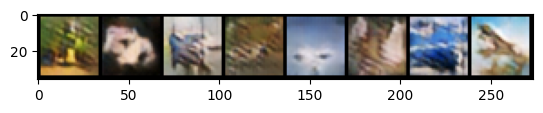

[15/20][0/391] Loss_D: 0.0809 Loss_G: 3.9611 D(x): 0.9606 D(G(z)): 0.0385 / 0.0276
saving the output
[15/20][50/391] Loss_D: 0.8768 Loss_G: 1.5970 D(x): 0.6048 D(G(z)): 0.2498 / 0.2436
saving the output
[15/20][100/391] Loss_D: 0.6086 Loss_G: 1.9894 D(x): 0.7168 D(G(z)): 0.2089 / 0.1632
saving the output
[15/20][150/391] Loss_D: 1.5741 Loss_G: 0.3062 D(x): 0.2711 D(G(z)): 0.0727 / 0.7541
saving the output
[15/20][200/391] Loss_D: 0.1097 Loss_G: 4.0297 D(x): 0.9799 D(G(z)): 0.0833 / 0.0235
saving the output
[15/20][250/391] Loss_D: 0.9503 Loss_G: 1.2971 D(x): 0.4945 D(G(z)): 0.1217 / 0.3198
saving the output
[15/20][300/391] Loss_D: 0.1202 Loss_G: 3.2077 D(x): 0.9528 D(G(z)): 0.0660 / 0.0586
saving the output
[15/20][350/391] Loss_D: 0.8676 Loss_G: 1.8980 D(x): 0.6431 D(G(z)): 0.2876 / 0.1877
saving the output


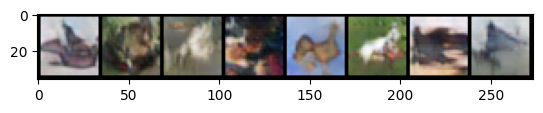

[16/20][0/391] Loss_D: 0.7851 Loss_G: 3.3609 D(x): 0.7549 D(G(z)): 0.3393 / 0.0496
saving the output
[16/20][50/391] Loss_D: 0.7324 Loss_G: 2.5637 D(x): 0.6841 D(G(z)): 0.2461 / 0.1017
saving the output
[16/20][100/391] Loss_D: 0.8814 Loss_G: 3.0270 D(x): 0.8966 D(G(z)): 0.4902 / 0.0649
saving the output
[16/20][150/391] Loss_D: 0.0871 Loss_G: 4.0052 D(x): 0.9830 D(G(z)): 0.0655 / 0.0259
saving the output
[16/20][200/391] Loss_D: 0.8789 Loss_G: 2.3099 D(x): 0.7613 D(G(z)): 0.4206 / 0.1162
saving the output
[16/20][250/391] Loss_D: 0.8760 Loss_G: 1.7731 D(x): 0.5902 D(G(z)): 0.2177 / 0.2196
saving the output
[16/20][300/391] Loss_D: 0.4435 Loss_G: 2.3198 D(x): 0.7455 D(G(z)): 0.1070 / 0.1339
saving the output
[16/20][350/391] Loss_D: 0.1451 Loss_G: 4.3071 D(x): 0.9559 D(G(z)): 0.0914 / 0.0191
saving the output


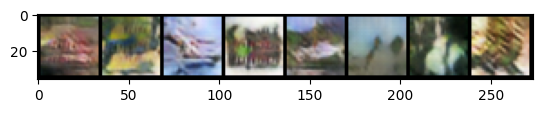

[17/20][0/391] Loss_D: 0.0240 Loss_G: 5.3982 D(x): 0.9874 D(G(z)): 0.0111 / 0.0067
saving the output
[17/20][50/391] Loss_D: 1.1805 Loss_G: 3.6962 D(x): 0.9378 D(G(z)): 0.6218 / 0.0364
saving the output
[17/20][100/391] Loss_D: 0.6819 Loss_G: 2.1985 D(x): 0.7386 D(G(z)): 0.2639 / 0.1440
saving the output
[17/20][150/391] Loss_D: 0.4672 Loss_G: 2.1935 D(x): 0.7062 D(G(z)): 0.0763 / 0.1479
saving the output
[17/20][200/391] Loss_D: 0.9768 Loss_G: 1.9598 D(x): 0.6505 D(G(z)): 0.3547 / 0.1710
saving the output
[17/20][250/391] Loss_D: 1.1502 Loss_G: 1.0066 D(x): 0.3997 D(G(z)): 0.0525 / 0.4321
saving the output
[17/20][300/391] Loss_D: 0.7565 Loss_G: 1.4431 D(x): 0.5587 D(G(z)): 0.0884 / 0.2747
saving the output
[17/20][350/391] Loss_D: 0.9537 Loss_G: 1.2488 D(x): 0.6998 D(G(z)): 0.3834 / 0.3469
saving the output


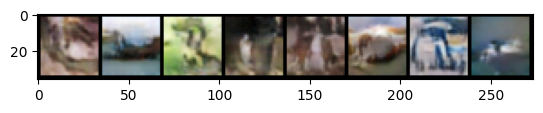

[18/20][0/391] Loss_D: 0.4512 Loss_G: 2.6659 D(x): 0.8621 D(G(z)): 0.2342 / 0.0926
saving the output
[18/20][50/391] Loss_D: 0.2419 Loss_G: 4.8257 D(x): 0.9724 D(G(z)): 0.1819 / 0.0119
saving the output
[18/20][100/391] Loss_D: 0.9142 Loss_G: 2.1397 D(x): 0.6636 D(G(z)): 0.3326 / 0.1480
saving the output
[18/20][150/391] Loss_D: 0.6982 Loss_G: 1.8341 D(x): 0.6897 D(G(z)): 0.2332 / 0.1936
saving the output
[18/20][200/391] Loss_D: 0.0411 Loss_G: 7.1798 D(x): 0.9614 D(G(z)): 0.0011 / 0.0011
saving the output
[18/20][250/391] Loss_D: 0.5431 Loss_G: 1.8241 D(x): 0.7601 D(G(z)): 0.1981 / 0.1969
saving the output
[18/20][300/391] Loss_D: 1.1556 Loss_G: 1.0236 D(x): 0.3994 D(G(z)): 0.0883 / 0.4008
saving the output
[18/20][350/391] Loss_D: 0.0226 Loss_G: 6.5222 D(x): 0.9800 D(G(z)): 0.0023 / 0.0024
saving the output


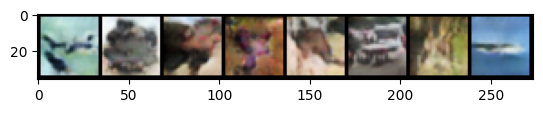

[19/20][0/391] Loss_D: 0.2679 Loss_G: 3.3298 D(x): 0.9698 D(G(z)): 0.1960 / 0.0504
saving the output
[19/20][50/391] Loss_D: 0.0742 Loss_G: 4.4424 D(x): 0.9679 D(G(z)): 0.0395 / 0.0168
saving the output
[19/20][100/391] Loss_D: 1.0616 Loss_G: 1.7459 D(x): 0.6739 D(G(z)): 0.3917 / 0.2282
saving the output
[19/20][150/391] Loss_D: 1.0180 Loss_G: 2.7792 D(x): 0.7586 D(G(z)): 0.4689 / 0.0818
saving the output
[19/20][200/391] Loss_D: 0.8036 Loss_G: 2.1566 D(x): 0.7119 D(G(z)): 0.3236 / 0.1496
saving the output
[19/20][250/391] Loss_D: 0.7280 Loss_G: 2.0097 D(x): 0.7137 D(G(z)): 0.2752 / 0.1678
saving the output
[19/20][300/391] Loss_D: 1.0135 Loss_G: 2.1493 D(x): 0.7802 D(G(z)): 0.4844 / 0.1472
saving the output
[19/20][350/391] Loss_D: 0.1364 Loss_G: 3.9221 D(x): 0.9401 D(G(z)): 0.0689 / 0.0272
saving the output


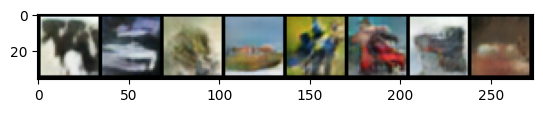

In [5]:
# OK the previous cell setup a good "classifier", now let's build our GAN
# source: modified from https://github.com/Ksuryateja/DCGAN-CIFAR10-pytorch/blob/master/gan_cifar.py

from __future__ import print_function
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

cudnn.benchmark = True

# flag for saving/loading
PATH_G = "/content/drive/MyDrive/models/generator-cifar10.pt"
PATH_D = "/content/drive/MyDrive/models/discriminator-cifar10.pt"
loadgan = False # change this to True once you have run this cell successfully

#checking the availability of cuda devices
device = 'cuda'
# number of gpu's available
ngpu = 1
# input noise dimension
nz = 100
# number of generator filters
ngf = 64
#number of discriminator filters
ndf = 64
# number of channels
nc=3

# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
            return output

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)

        return output.view(-1, 1).squeeze(1)

netG = Generator(ngpu).to(device)
netG.apply(weights_init)
netD = Discriminator(ngpu).to(device)
netD.apply(weights_init)

if loadgan:
  #load weights to test the model 
  netG.load_state_dict(torch.load(PATH_G))
  netD.load_state_dict(torch.load(PATH_D))
  print(netG)
  print(netD)

else:
  print(netG)
  print(netD)

  #set manual seed to a constant get a consistent output
  manualSeed = random.randint(1, 10000)
  print("Random Seed: ", manualSeed)
  random.seed(manualSeed)
  torch.manual_seed(manualSeed)

  #loading the dataset
  dataset = dset.CIFAR10(root="./data", download=True,
                            transform=transforms.Compose([
                                transforms.Resize(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                            ]))

  dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                          shuffle=True, num_workers=2)

  criterion = nn.BCELoss()

  # setup optimizer
  optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
  optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

  fixed_noise = torch.randn(128, nz, 1, 1, device=device)
  real_label = 1.0 # needed to change from 1 to 1.0
  fake_label = 0.0 # needed to change from 0 to 0.0

  niter = 20
  g_loss = []
  d_loss = []

  ################################################
  # COSC 470 - HERE ARE YOUR TWO DATA STRUCTURES #
  ################################################
  confidences = []
  counts = [0]*10
  for epoch in range(niter):
      for i, data in enumerate(dataloader, 0):
          # Backprop D network: maximize log(D(x)) + log(1 - D(G(z)))
          # train with real
          netD.zero_grad()
          real_cpu = data[0].to(device)
          batch_size = real_cpu.size(0)
          label = torch.full((batch_size,), real_label, device=device)

          output = netD(real_cpu)
          errD_real = criterion(output, label)
          errD_real.backward()
          D_x = output.mean().item()

          # train with fake
          noise = torch.randn(batch_size, nz, 1, 1, device=device)
          fake = netG(noise)
          label.fill_(fake_label)
          output = netD(fake.detach())
          errD_fake = criterion(output, label)
          errD_fake.backward()
          D_G_z1 = output.mean().item()
          errD = errD_real + errD_fake
          optimizerD.step()

          # Backprop G network: maximize log(D(G(z)))
          netG.zero_grad()
          label.fill_(real_label)  # fake labels are real for generator cost
          output = netD(fake)
          errG = criterion(output, label)
          errG.backward()
          D_G_z2 = output.mean().item()
          optimizerG.step()
          
          #save the output
          if i % 50 == 0:
              print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f' % (epoch, niter, i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
              print('saving the output')
              vutils.save_image(real_cpu,'/content/drive/MyDrive/output/real_samples.png',normalize=True)
              fake = netG(fixed_noise)
              vutils.save_image(fake.detach(),'/content/drive/MyDrive/output/fake_samples_epoch_%03d.png' % (epoch),normalize=True)

      ##########################################################################################################
      # COSC 470 - use the classifier from the previous code cell called "net" to classify the last            #
      # batch of fake images generated in this epoch. Then calculate the predictions and averager confidences. #
      # also increment the label counts. HINT: move the code from the next cell up to this block and modify it.#
      ##########################################################################################################
      noise = torch.randn(8, nz, 1, 1, device=device)
      imgs = netG(noise)
      transform=transforms.Compose([transforms.Resize(32, antialias=False)])
      imgs = transform(imgs)
      imshow(torchvision.utils.make_grid(imgs.cpu().detach(), normalize=True))
      output = net(imgs) # use our classifier from the first cell to classify these generated images
      output = F.softmax(output, dim=1)
      conf, predictions = torch.max(output, dim=1)  # conf has the softmx confidences, predictions has the predictions
      confidences = confidences + [c.cpu() for c in conf]
      for pred in predictions:
        counts[pred] += 1 
      # Check pointing after every epoch
      torch.save(netG.state_dict(), PATH_G)
      torch.save(netD.state_dict(), PATH_D)

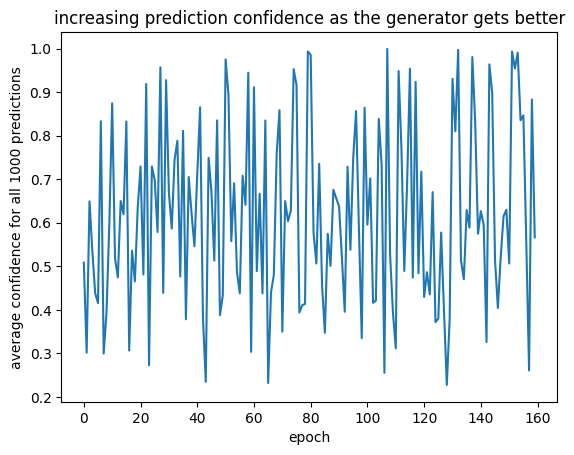

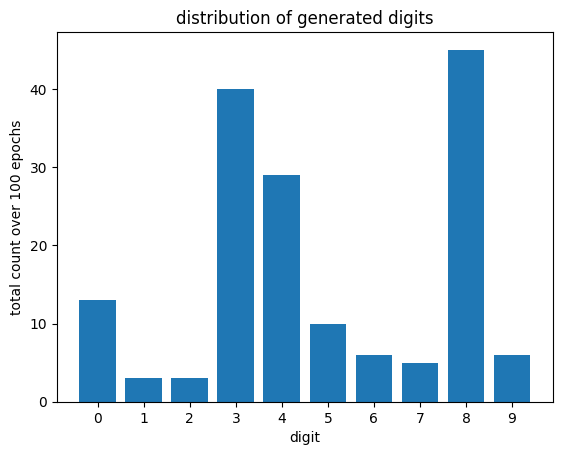

In [6]:
# now let's plot the average confidences in the predictions over the epochs
import matplotlib.pyplot as plt
plt.plot([float(c) for c in confidences])
plt.xlabel("epoch")
plt.ylabel("average confidence for all 1000 predictions")
plt.title("increasing prediction confidence as the generator gets better")
plt.show()

plt.bar([f"{x}" for x in range(10)], counts)
plt.xlabel("digit")
plt.ylabel("total count over 100 epochs")
plt.title("distribution of generated digits")
plt.show()